In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
font = {'family' : 'Foundry',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True)

In [2]:
def mgP(gamma,V0,PH,EH,E):
    return (gamma/V0)*(E-EH)+PH

### Olinger et al.

In [3]:
C = 2.74 #mm/us
S = 2.6
rho0 = 1.9 #g cm^-3
V0 = 1./rho0

In [4]:
Vrel = np.linspace(1,0.5,100)

In [5]:
VH = Vrel*V0
PH = (C**2.)*(V0-VH)/((V0-S*(V0-VH))**2.)
EH = (0.5)*C**2.*(V0-VH)**2./((V0-S*(V0-VH))**2.)

Text(0, 0.5, '$P$  /GPa')

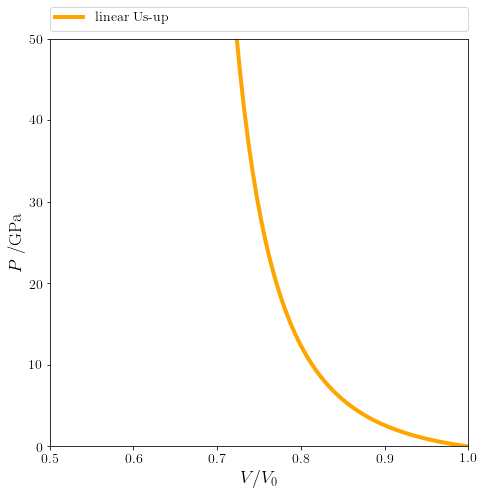

In [6]:
fig= plt.figure(figsize=(7.5,7.5))
plt.plot(Vrel,PH,linewidth=4.0,color="orange",label='linear Us-up')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlim((0.5,1.))
plt.ylim((0.,50.))
plt.xlabel("$V/V_0$",fontsize=18)
plt.ylabel("$P$  /GPa",fontsize=18)

### Yoo and Cynn

In [7]:
#below 27 GPa
K_T0 = 12.4
dK_T0 = 10.4

Gamma = 1.1
E0 = 0

P_BM = (3./2.)*K_T0*(Vrel**(-7./3.)-Vrel**(-5./3.))*(1.+(3./4.)*(dK_T0-4.)*(Vrel**(-2./3.)-1.))
E_BM = E0 + (9./16.)*V0*K_T0*((Vrel**(-2./3.)-1)**3.*dK_T0+(Vrel**(-2./3.)-1)**2.*(6.-4.*Vrel**(-2./3.)))

Text(0, 0.5, '$P$  /GPa')

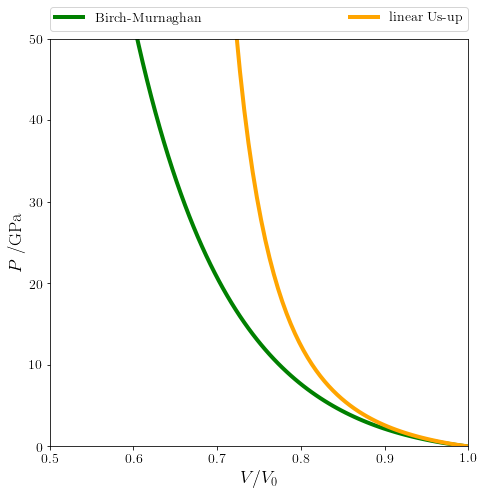

In [8]:
fig=plt.figure(figsize=(7.5,7.5))
plt.plot(Vrel,P_BM,linewidth=4.0,color="green",label='Birch-Murnaghan')
plt.plot(Vrel,PH,linewidth=4.0,color="orange",label='linear Us-up')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlim((0.5,1.))
plt.ylim((0.,50.))
plt.xlabel("$V/V_0$",fontsize=18)
plt.ylabel("$P$  /GPa",fontsize=18)

### Hugoniot from Birch-Murnaghan

In [10]:
PH_MG = np.zeros(Vrel.shape[0])

for i in np.arange(Vrel.shape[0]):
    PH_MG[i] = (E_BM[i]-(V0/Gamma)*P_BM[i])/(0.5*(V0-Vrel[i]*V0)-(V0/Gamma))

EH_MG = (0.5)*PH_MG*(V0-Vrel*V0)

Text(0, 0.5, '$P$  /GPa')

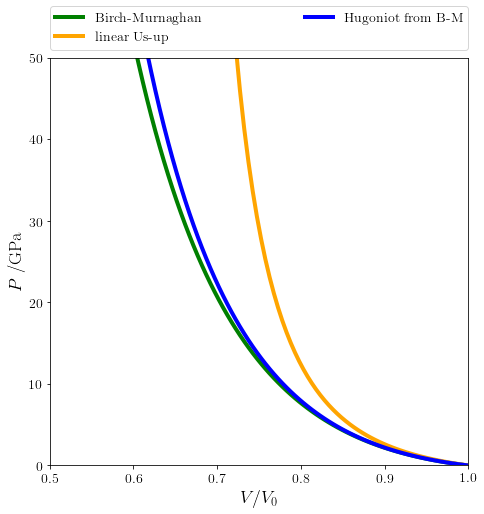

In [11]:
fig= plt.figure(figsize=(7.5,7.5))
plt.plot(Vrel,P_BM,linewidth=4.0,color="green",label='Birch-Murnaghan')
plt.plot(Vrel,PH,linewidth=4.0,color="orange",label='linear Us-up')
plt.plot(Vrel,PH_MG,linewidth=4.0,color="blue",label='Hugoniot from B-M')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlim((0.5,1.))
plt.ylim((0.,50.))
plt.xlabel("$V/V_0$",fontsize=18)
plt.ylabel("$P$  /GPa",fontsize=18)

### EOS surfaces

In [12]:
E_EOS = np.linspace(0.,8.,100)
P_EOS1 = np.zeros([E_EOS.shape[0],Vrel.shape[0]])
P_EOS2 = np.zeros([E_EOS.shape[0],Vrel.shape[0]])

for i in np.arange(Vrel.shape[0]):
    for j in np.arange(E_EOS.shape[0]):
        P_EOS1[j,i] = mgP(Gamma,V0,P_BM[i],E_BM[i],E_EOS[j])
        P_EOS2[j,i] = mgP(Gamma,V0,PH[i],EH[i],E_EOS[j])

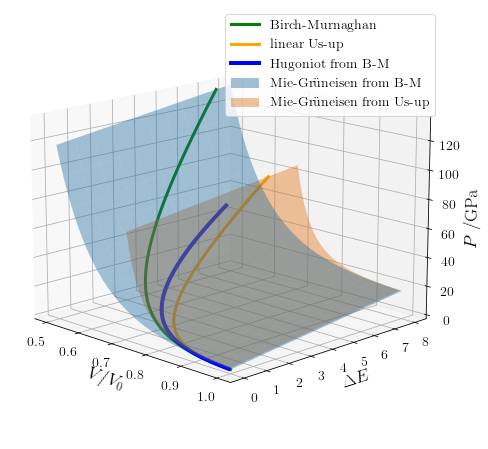

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
X, Y = np.meshgrid(Vrel,E_EOS, sparse=False)
c1 = ax.plot_surface(X, Y, P_EOS1,alpha=0.4,linewidth=0,rstride=10,cstride=5,label=r'Mie-Gr\"{u}neisen from B-M')
c2 = ax.plot_surface(X[1:100,1:60], Y[1:100,1:60], P_EOS2[1:100,1:60],alpha=0.4,linewidth=0,rstride=10,cstride=5,label=r'Mie-Gr\"{u}neisen from Us-up')
c1._facecolors2d=c1._facecolor3d
c1._edgecolors2d=c1._edgecolor3d
c2._facecolors2d=c2._facecolor3d
c2._edgecolors2d=c2._edgecolor3d
ax.plot(Vrel,E_BM,P_BM,linewidth=3,color="green",label='Birch-Murnaghan')
ax.plot(Vrel[1:60],EH[1:60],PH[1:60],linewidth=3,color="orange",label='linear Us-up')
ax.plot(Vrel[1:80],EH_MG[1:80],PH_MG[1:80],linewidth=4.0,color="blue",label='Hugoniot from B-M')
ax.set_ylabel("$\Delta E$",fontsize=18)
ax.set_zlabel("$P$   /GPa",fontsize=18)
ax.set_xlabel("$V/V_0$",fontsize=18)
ax.view_init(15, -45)
ax.legend()